In [1]:
from dataWrangler import *
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import glob 
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale


In [2]:
li=[]
for filename in glob.glob(r"..\UsedCar-PriceEstimator\data\*.csv"):
    collection = pd.read_csv(filename, index_col=None, header=0)
    li.append(collection)
frame = pd.concat(li, axis=0, ignore_index=True)

In [4]:
frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90087 entries, 0 to 90086
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     90087 non-null  int64  
 1   year:          90087 non-null  float64
 2   make:          90087 non-null  object 
 3   model:         90087 non-null  object 
 4   trim:          42777 non-null  object 
 5   VIN:           15392 non-null  object 
 6   condition:     71776 non-null  object 
 7   odometer:      90087 non-null  int64  
 8   cylinders:     66556 non-null  object 
 9   color:         61599 non-null  object 
 10  transmission:  90087 non-null  object 
 11  type:          56501 non-null  object 
 12  status:        90087 non-null  object 
 13  drive:         57192 non-null  object 
 14  fuel:          90087 non-null  object 
 15  price:         89869 non-null  float64
dtypes: float64(2), int64(2), object(12)
memory usage: 11.0+ MB


In [5]:
df=Spell(frame)
df=Replace(df)
all_makes=Process(df)

In [6]:
all_makes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53836 entries, 0 to 53835
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Make&Model  53836 non-null  object
 1   year:       53836 non-null  int64 
 2   score:      53836 non-null  int64 
 3   odometer:   53836 non-null  int64 
 4   cylinders:  53836 non-null  int32 
 5   price:      53836 non-null  int32 
dtypes: int32(2), int64(3), object(1)
memory usage: 2.1+ MB


In [7]:
df=Process(df,'toyota prius')

In [10]:
df=Outliers_light(df)

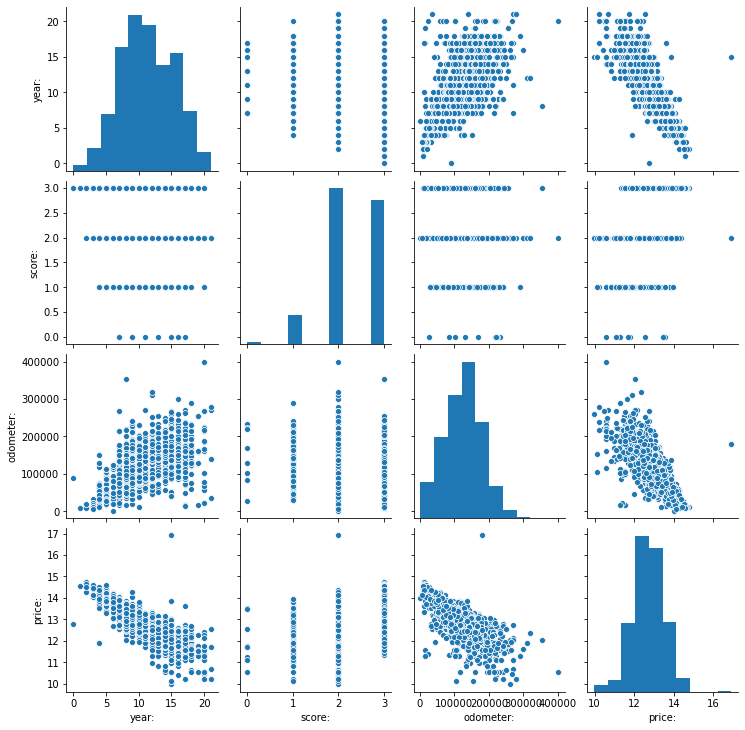

In [147]:
_=sns.pairplot(data=df)

In [148]:
all_makes=Outliers_light(all_makes)
all_makes.shape

(43097, 5)

In [149]:
df_test = df['Make&Model'].value_counts().rename_axis('unique_values').to_frame('counts')
df_test=df_test.reset_index()
df_test=df_test[(df_test['counts']>430) & (df_test['counts']<620) ]


KeyError: 'Make&Model'

In [150]:
thelist=list(df_test.unique_values)
    
df_test.tail()

,unique_values,counts
14,honda crv,457
15,ford f250,442
16,volkswagen jetta,438
17,honda odyssey,434
18,toyota sienna,431


Text(0, 0.5, 'Log Price')

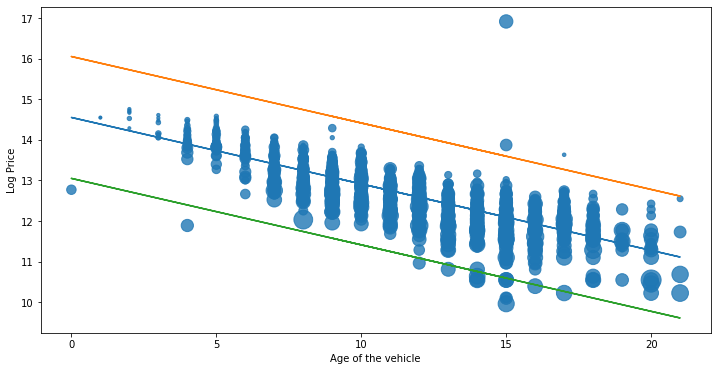

In [152]:
plt.figure(figsize=(12,6))
plt.scatter(df['year:'],df['price:'], s=df['odometer:']/1000, alpha=0.8)
m, b = np.polyfit(df['year:'], df['price:'], 1)
plt.plot(df['year:'], m*df['year:']+ b)
plt.plot(df['year:'], m*df['year:']+ b+1.5)
plt.plot(df['year:'], m*df['year:']+ b-1.5)
plt.xlabel('Age of the vehicle')
plt.ylabel('Log Price')

In [153]:
try:
    m, b = np.polyfit(df['year:'], df['price:'], 1)
except:
    m, b = np.polyfit(df['year:'], df['price:'], 1)
df_new=df
for x,y in zip(df['year:'], m*df['year:']+ b-0.5):
    left=x
    bottom=y
    multi_outliers = df_new[(df_new['price:'] <bottom) & (df_new['year:'] < left)]
    df_new=df_new[(~df_new.isin(multi_outliers) )]
for x,y in zip(df['year:'], m*df['year:']+ b+0.5):
    right=x
    top=y
    multi_outliers2 = df[(df['price:'] >top) & (df['year:'] > right) ]
    df_new=df_new[(~df_new.isin(multi_outliers2) )]


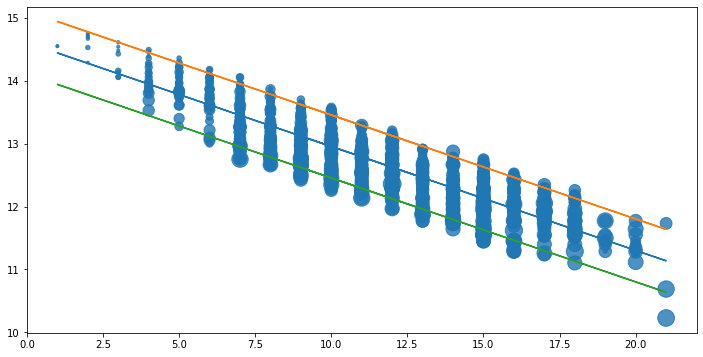

In [154]:
df_new=df_new.dropna()
plt.figure(figsize=(12,6))
plt.scatter(df_new['year:'],df_new['price:'], s=df_new['odometer:']/1000, alpha=0.8)
m, b = np.polyfit(df_new['year:'], df_new['price:'], 1)
plt.plot(df_new['year:'], m*df_new['year:']+ b)
plt.plot(df_new['year:'], m*df_new['year:']+ b+0.5)
plt.plot(df_new['year:'], m*df_new['year:']+ b-0.5)


In [13]:
#import pandas_profiling
#profile=df.profile_report()

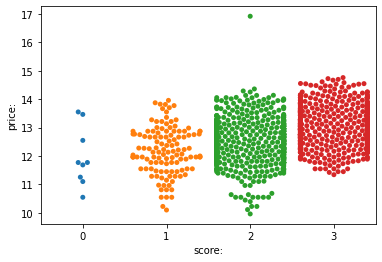

In [155]:
_=sns.swarmplot(x='score:',y='price:',data=df)


In [ ]:
# Plot the ECDF
_ = plt.plot(x_vers, y_vers, '.')
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('ECDF')

# Overlay percentiles as red x's
_ = plt.plot(ptiles_vers, percentiles/100, marker='D', color='red',
         linestyle='none')

# Show the plot
plt.show()


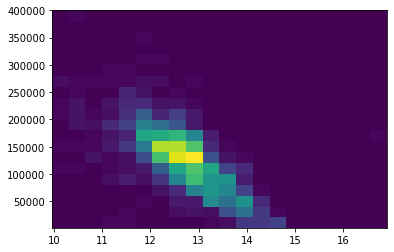

In [156]:
_=plt.hist2d(df['price:'], df['odometer:'], bins=(20,20))

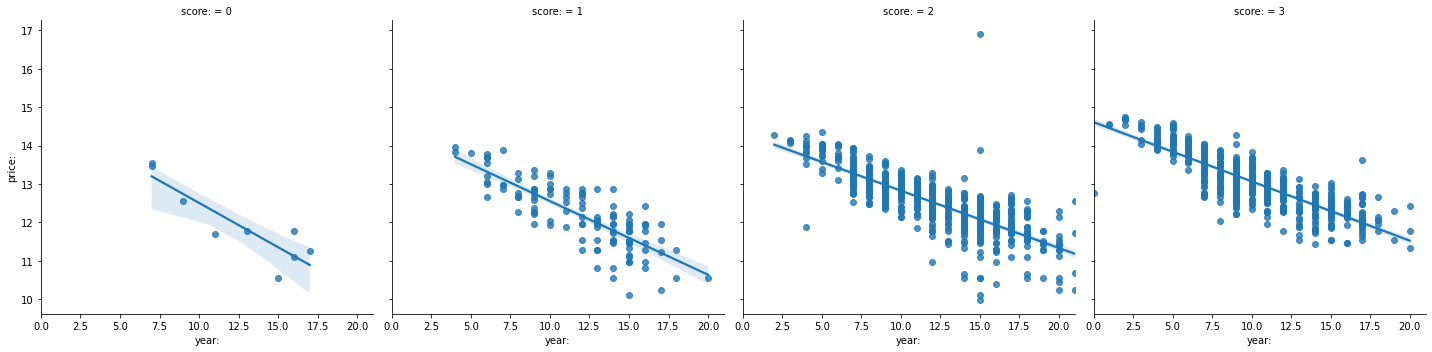

In [160]:
_=sns.lmplot(col='score:',x='year:', y='price:', data=df)

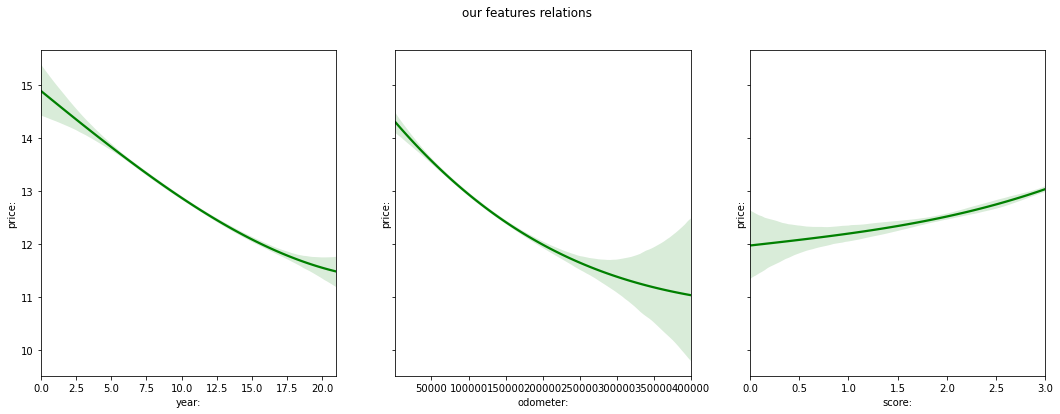

In [161]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)
fig.suptitle('our features relations')

sns.regplot(ax=axes[0],x='year:', y='price:', data=df, scatter=None, order=3, color='green')
sns.regplot(ax=axes[1],x='odometer:', y='price:', data=df, scatter=None, order=3, color='green')
sns.regplot(ax=axes[2],x='score:', y='price:', data=df, scatter=None, order=3, color='green')


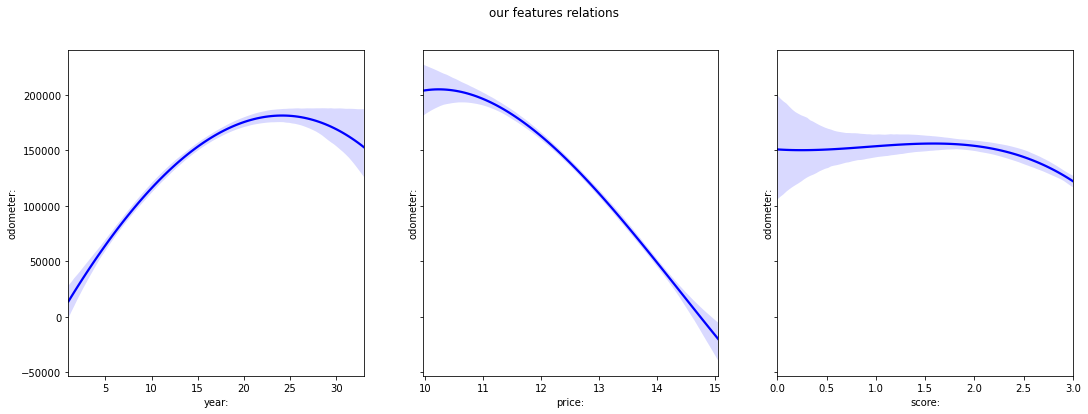

In [122]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)
fig.suptitle('our features relations')

sns.regplot(ax=axes[0],x='year:', y='odometer:', data=df, scatter=None, order=3, color='blue')
sns.regplot(ax=axes[1],x='price:', y='odometer:', data=df, scatter=None, order=3, color='blue')
sns.regplot(ax=axes[2],x='score:', y='odometer:', data=df, scatter=None, order=3, color='blue')


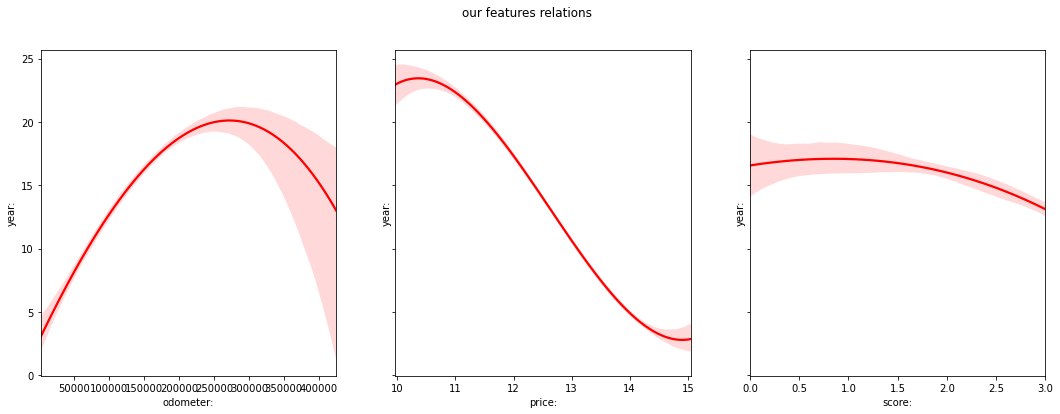

In [123]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)
fig.suptitle('our features relations')

sns.regplot(ax=axes[0],x='odometer:', y='year:', data=df, scatter=None, order=3, color='red')
sns.regplot(ax=axes[1],x='price:', y='year:', data=df, scatter=None, order=3, color='red')
sns.regplot(ax=axes[2],x='score:', y='year:', data=df, scatter=None, order=3, color='red')
